In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,RMSprop
from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_csv("D:\\Source_code\\Lab\\data\\seattle-weather.csv")
data=data.drop("date",axis=1)
#data.head()

X=data.drop("weather",axis=1)
Y=pd.get_dummies(data['weather'])



X.head()
Y.head()


,drizzle,fog,rain,snow,sun
0,True,False,False,False,False
1,False,False,True,False,False
2,False,False,True,False,False
3,False,False,True,False,False
4,False,False,True,False,False


In [5]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,random_state=42,test_size=0.2)

In [7]:
model=Sequential([
    Dense(128),
    Dense(64),
    Dense(32),
    Dense(5,activation='softmax')
])

config={
    'SGD':SGD(0.01),
    'SGD+Momentum':SGD(0.01,momentum=0.9),
    'Nestrov':SGD(0.01,momentum=0.9,nesterov=True),
    'Adam':Adam(0.01),
    'RMSprop':RMSprop(0.01),
    'Adagrad':Adagrad(0.01)
}


logs={}

for name,opt in config.items():
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
    log=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=5,batch_size=64)
    logs[name]=log.history

Epoch 1/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5051 - loss: 2.7685 - val_accuracy: 0.7406 - val_loss: 0.8671
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7414 - loss: 0.8824 - val_accuracy: 0.3447 - val_loss: 2.5482
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7115 - loss: 0.9589 - val_accuracy: 0.7304 - val_loss: 0.7625
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7568 - loss: 0.7142 - val_accuracy: 0.7747 - val_loss: 0.7236
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7483 - loss: 0.7303 - val_accuracy: 0.7782 - val_loss: 0.6787
Epoch 1/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7500 - loss: 0.9156 - val_accuracy: 0.6109 - val_loss: 1.0529
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7740 - loss: 0.8120 - val_accuracy: 0.7679 - val_loss: 0.9334
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7517 - loss: 0.8026 - val_accuracy: 0.7440 - val_loss: 0.865

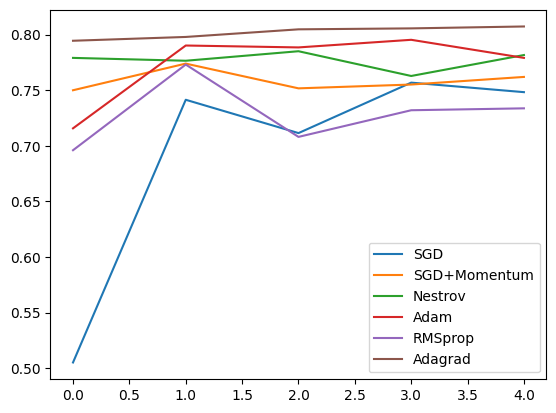

In [8]:
for name,log in logs.items():
    plt.plot(log['accuracy'],label=name)
plt.legend()
plt.show()